In [1]:
import pandas as pd
import json


json_file_path = 'data/raw/2024-09-11 District A Benchmarks.json'

with open(json_file_path, 'r') as json_file:
    data = json.load(json_file)

#normalize/ convert list to dict
def normalize_json_column(column):
    if isinstance(column, list) and len(column) > 0 and isinstance(column[0], dict):
        return pd.json_normalize(column, sep='_')
    return pd.DataFrame() #normalize/ convert list to dict

# Normalize each column
benchmarks_df = normalize_json_column(data['benchmarks'])

# Scores vs. course section rosters

In [3]:
benchmarks_df

,districtId,year,level,dataSource,value
0,45,2017,3,value_scantronMath,2356.0
1,45,2017,3,value_scantronReading,2563.0
2,45,2017,4,value_scantronMath,2493.0
3,45,2017,4,value_scantronReading,2674.0
4,45,2017,5,value_scantronMath,2584.0
5,45,2017,5,value_scantronReading,2841.0
6,45,2017,6,value_scantronMath,2675.0
7,45,2017,6,value_scantronReading,2897.0
8,45,2017,7,value_scantronMath,2766.0
9,45,2017,7,value_scantronReading,3008.0


In [4]:
import pandas as pd
import json


json_file_path = 'data/raw/district.json'

with open(json_file_path, 'r') as json_file:
    data = json.load(json_file)

#normalize/ convert list to dict
def normalize_json_column(column):
    if isinstance(column, list) and len(column) > 0 and isinstance(column[0], dict):
        return pd.json_normalize(column, sep='_')
    return pd.DataFrame()  

# Normalize each column
benchmarks_2_df = normalize_json_column(data['benchmarks'])
schools_df = normalize_json_column(data['schools'])
course_sections_df = normalize_json_column(data['courseSections'])
course_section_rosters_df = normalize_json_column(data['courseSectionRosters']) #will only use this for this EDA
scores_2_df = normalize_json_column(data['scores']) 

In [5]:
course_section_rosters_df 

,id,courseSectionId,studentId,studentLevel,ticket
0,1047696,39975,45333,4,
1,1047704,39975,56116,4,
2,1047706,39975,45345,4,
3,1047715,39975,45400,4,
4,1047729,39975,45413,4,
...,...,...,...,...,...
612236,7254071,401685,53169,4,RTI-Redville
612237,7254072,401685,53170,3,RTI-Redville
612238,7254073,401685,53286,4,RTI-Redville
612239,7254074,401685,53399,3,RTI-Redville


In [6]:
course_section_rosters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612241 entries, 0 to 612240
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               612241 non-null  object
 1   courseSectionId  612241 non-null  object
 2   studentId        612241 non-null  object
 3   studentLevel     612241 non-null  object
 4   ticket           612241 non-null  object
dtypes: object(5)
memory usage: 23.4+ MB


In [7]:
course_sections_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17662 entries, 0 to 17661
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        17662 non-null  object
 1   vanityId  17662 non-null  object
 2   year      17662 non-null  object
 3   schoolId  17662 non-null  object
dtypes: object(4)
memory usage: 552.1+ KB


In [8]:
with open(r'data/raw/2024-09-11 District A Scores.json', 'r') as file:
    scores_json = json.loads(file.read())

scores_data = scores_json[list(scores_json.keys())[0]]
scores_df = pd.DataFrame(scores_data)

In [9]:
scores_df

,studentId,studentLevel,year,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,...,value_starReading,value_starMath,value_ScienceMilestones,value_LEAPScience,value_SocialMilestones,value_gcaInfo,value_gcaNar,value_gcaOpin,value_aimsWebMath,value_aimsWebReading
0,44774,9,2018,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,44774,8,2017,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,44774,8,2017,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44775,8,2017,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,44775,8,2017,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303745,259510,5,2018,3,0,0,0,0,0,0,...,0,0,510,0,497,0,0,0,0,0
303746,259511,5,2018,3,0,0,0,0,0,0,...,0,0,464,0,490,0,0,0,0,0
303747,259512,5,2018,3,0,0,0,0,0,0,...,0,0,454,0,453,0,0,0,0,0
303748,259513,5,2018,3,0,0,0,0,0,0,...,0,0,520,0,494,0,0,0,0,0


## analyzing scores_df and addressing null values

In [11]:
scores_df.columns

Index(['studentId', 'studentLevel', 'year', 'measurementTypeId',
       'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender',
       'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25',
       'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
       'value_actScienceScore', 'value_actCompositeScore', 'value_nweaMath',
       'value_nweaReading', 'value_nweaEnglish', 'value_iReadyMath',
       'value_iReadyReading', 'value_actMasteryComposite',
       'value_actMasteryReading', 'value_actMasteryMath',
       'value_actMasteryScience', 'value_actMasteryEnglish', 'value_nweaELA',
       'value_scantronMath', 'value_scantronReading', 'value_mapMath',
       'value_mapEnglish', 'value_mapReading', 'value_mapRLA',
       'value_scantronScience', 'value_scantronLanguage',
       'value_ReadingFoundations', 'value_scantronAlgebra', 'value_eocMath',
       'value_actELAScore', 'value_mapScience', 'value_LeapELAScale',
       'value_LeapMathScale', 'value_L

In [12]:
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303750 entries, 0 to 303749
Data columns (total 69 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   studentId                         303750 non-null  int64  
 1   studentLevel                      303750 non-null  int64  
 2   year                              303750 non-null  int64  
 3   measurementTypeId                 303750 non-null  int64  
 4   subgroup_specialEd                303750 non-null  int64  
 5   subgroup_lunchStatus              303750 non-null  int64  
 6   subgroup_gender                   303750 non-null  int64  
 7   subgroup_ethnicity                303750 non-null  int64  
 8   subgroup_ell                      303750 non-null  int64  
 9   subgroup_bottom25                 303750 non-null  int64  
 10  value_actMathScore                303750 non-null  float64
 11  value_actEnglishScore             303750 non-null  f

**There are several missing values in  value_scantronMath** however, those were replaced by 0

In [13]:
# Check for rows with null values
null_rows = scores_df[scores_df.isnull().any(axis=1)]
null_rows


,studentId,studentLevel,year,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,...,value_starReading,value_starMath,value_ScienceMilestones,value_LEAPScience,value_SocialMilestones,value_gcaInfo,value_gcaNar,value_gcaOpin,value_aimsWebMath,value_aimsWebReading
11,44777,7,2020,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,44783,7,2020,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,44784,6,2020,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109,44807,7,2020,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
119,44809,7,2020,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303745,259510,5,2018,3,0,0,0,0,0,0,...,0,0,510,0,497,0,0,0,0,0
303746,259511,5,2018,3,0,0,0,0,0,0,...,0,0,464,0,490,0,0,0,0,0
303747,259512,5,2018,3,0,0,0,0,0,0,...,0,0,454,0,453,0,0,0,0,0
303748,259513,5,2018,3,0,0,0,0,0,0,...,0,0,520,0,494,0,0,0,0,0


In [14]:
# Count how many null values are in each row
null_counts_per_row = null_rows.isnull().sum(axis=1)

null_counts_per_row

11        1
32        1
40        1
109       1
119       1
         ..
303745    1
303746    1
303747    1
303748    1
303749    1
Length: 50490, dtype: int64

In [15]:

null_rows

,studentId,studentLevel,year,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,...,value_starReading,value_starMath,value_ScienceMilestones,value_LEAPScience,value_SocialMilestones,value_gcaInfo,value_gcaNar,value_gcaOpin,value_aimsWebMath,value_aimsWebReading
11,44777,7,2020,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,44783,7,2020,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,44784,6,2020,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109,44807,7,2020,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
119,44809,7,2020,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303745,259510,5,2018,3,0,0,0,0,0,0,...,0,0,510,0,497,0,0,0,0,0
303746,259511,5,2018,3,0,0,0,0,0,0,...,0,0,464,0,490,0,0,0,0,0
303747,259512,5,2018,3,0,0,0,0,0,0,...,0,0,454,0,453,0,0,0,0,0
303748,259513,5,2018,3,0,0,0,0,0,0,...,0,0,520,0,494,0,0,0,0,0


In [16]:

null_count_value_scantronMath = scores_df['value_scantronMath'].isnull().sum()

print(f"Total number of nulls in 'value_scantronMath': {null_count_value_scantronMath}")


Total number of nulls in 'value_scantronMath': 50490


In [17]:
scores_df['value_scantronMath'].unique()

array([   0., 2841., 2808., ..., 3442., 3389., 3341.])

In [18]:
import matplotlib.pyplot as plt

value_counts = scores_df['value_scantronMath'].value_counts(dropna=False)

print(value_counts)


value_scantronMath
0.0       114351
NaN        50490
2644.0       325
2416.0       321
2562.0       309
           ...  
1525.0         1
1303.0         1
3340.0         1
1420.0         1
3341.0         1
Name: count, Length: 2102, dtype: int64


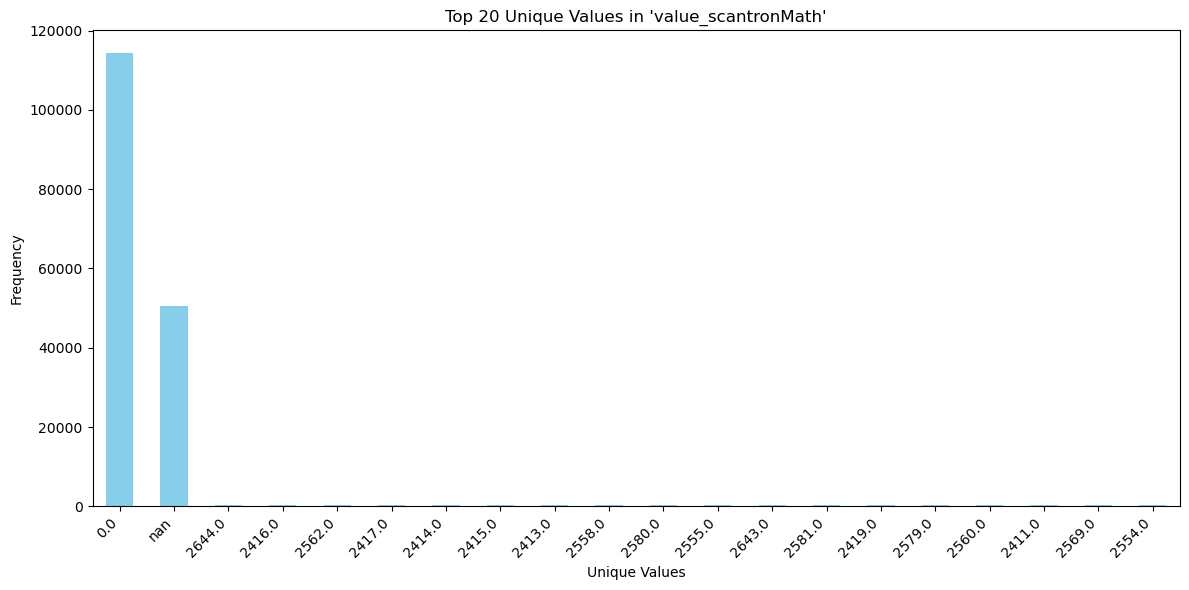

In [19]:
import matplotlib.pyplot as plt

value_counts = scores_df['value_scantronMath'].value_counts(dropna=False)


top_values = value_counts.head(20)

plt.figure(figsize=(12, 6))
top_values.plot(kind='bar', color='skyblue')
plt.title("Top 20 Unique Values in 'value_scantronMath'")
plt.xlabel("Unique Values")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


Since the top 2 values are 0 and Nan, the next graph focuses on the other values

value_scantronMath
0.0       114351
NaN        50490
2644.0       325
2416.0       321
2562.0       309
           ...  
1525.0         1
1303.0         1
3340.0         1
1420.0         1
3341.0         1
Name: count, Length: 2102, dtype: int64


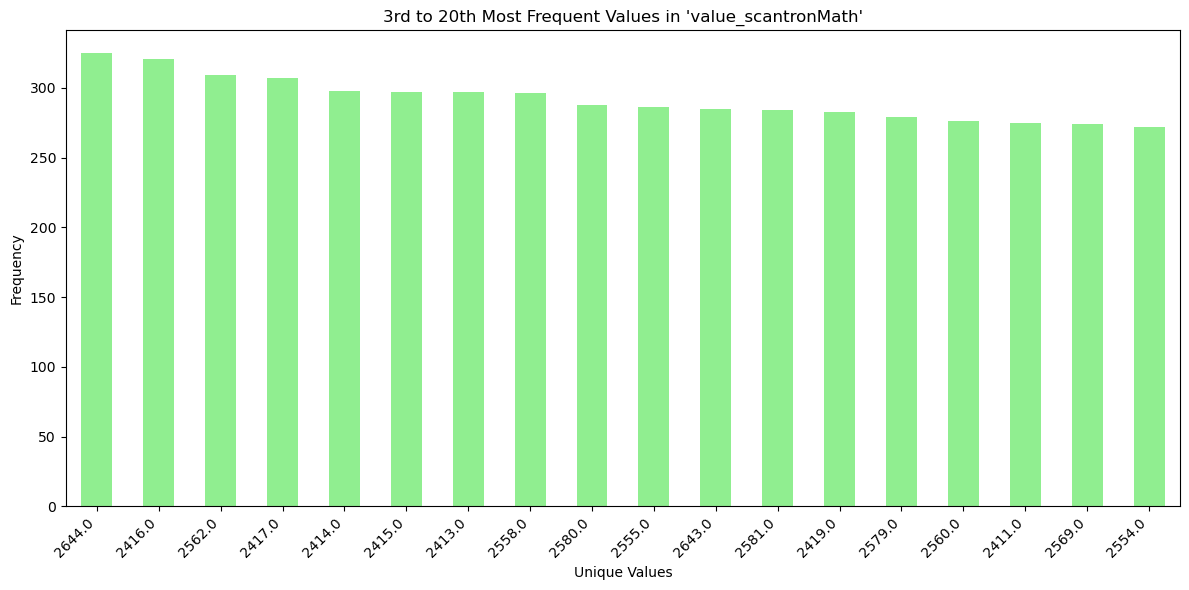

In [21]:

value_counts = scores_df['value_scantronMath'].value_counts(dropna=False)

print(value_counts)

top_3_to_20_values = value_counts.iloc[2:20]


plt.figure(figsize=(12, 6))
top_3_to_20_values.plot(kind='bar', color='lightgreen')
plt.title("3rd to 20th Most Frequent Values in 'value_scantronMath'")
plt.xlabel("Unique Values")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()


In [22]:
scores_df.fillna(0)

,studentId,studentLevel,year,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,...,value_starReading,value_starMath,value_ScienceMilestones,value_LEAPScience,value_SocialMilestones,value_gcaInfo,value_gcaNar,value_gcaOpin,value_aimsWebMath,value_aimsWebReading
0,44774,9,2018,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,44774,8,2017,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,44774,8,2017,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44775,8,2017,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,44775,8,2017,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303745,259510,5,2018,3,0,0,0,0,0,0,...,0,0,510,0,497,0,0,0,0,0
303746,259511,5,2018,3,0,0,0,0,0,0,...,0,0,464,0,490,0,0,0,0,0
303747,259512,5,2018,3,0,0,0,0,0,0,...,0,0,454,0,453,0,0,0,0,0
303748,259513,5,2018,3,0,0,0,0,0,0,...,0,0,520,0,494,0,0,0,0,0


In [23]:
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303750 entries, 0 to 303749
Data columns (total 69 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   studentId                         303750 non-null  int64  
 1   studentLevel                      303750 non-null  int64  
 2   year                              303750 non-null  int64  
 3   measurementTypeId                 303750 non-null  int64  
 4   subgroup_specialEd                303750 non-null  int64  
 5   subgroup_lunchStatus              303750 non-null  int64  
 6   subgroup_gender                   303750 non-null  int64  
 7   subgroup_ethnicity                303750 non-null  int64  
 8   subgroup_ell                      303750 non-null  int64  
 9   subgroup_bottom25                 303750 non-null  int64  
 10  value_actMathScore                303750 non-null  float64
 11  value_actEnglishScore             303750 non-null  f

In [24]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Assuming scores_df is already defined and loaded
for column in scores_df.columns:
    unique_values = scores_df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")

Unique values in column 'studentId':
[ 44774  44775  44776 ... 259512 259513 259514]


Unique values in column 'studentLevel':
[ 9  8  6  7  5 12 11 10  4  3  2  1  0 99 98 97 96 -1]


Unique values in column 'year':
[2018 2017 2020 2015 2016 2014    0]


Unique values in column 'measurementTypeId':
[6 4 5 0 3 1 2 7]


Unique values in column 'subgroup_specialEd':
[   0    1    2 1000    7    6]


Unique values in column 'subgroup_lunchStatus':
[0 1 3 6 5]


Unique values in column 'subgroup_gender':
[0 4 3 6 5]


Unique values in column 'subgroup_ethnicity':
[ 0 10  9 18 17]


Unique values in column 'subgroup_ell':
[0 3]


Unique values in column 'subgroup_bottom25':
[0 1]


Unique values in column 'value_actMathScore':
[ 0. 14.  9. 15. 18. 16. 22. 25. 34. 17. 27. 13. 11. 19. 21. 20. 23. 24.
 12. 26. 30. 28. 29. 32. 10. 31. 36. 35. 33.]


Unique values in column 'value_actEnglishScore':
[ 0. 14.  3. 15. 25. 24. 21. 36. 11. 23. 16. 20. 17. 13. 22. 12. 10.  8.
  6.  7.  9. 19. 27. 26. 

In [25]:
#prints the range of values
for column in scores_df.columns:
    if pd.api.types.is_numeric_dtype(scores_df[column]):
        min_value = scores_df[column].min()
        max_value = scores_df[column].max()
        print(f"Range of values in column '{column}': {min_value} to {max_value}")
    else:
        unique_values = scores_df[column].unique()
        print(f"Unique values in column '{column}':")
        print(unique_values)
    print("\n")

Range of values in column 'studentId': 44774 to 259514


Range of values in column 'studentLevel': -1 to 99


Range of values in column 'year': 0 to 2020


Range of values in column 'measurementTypeId': 0 to 7


Range of values in column 'subgroup_specialEd': 0 to 1000


Range of values in column 'subgroup_lunchStatus': 0 to 6


Range of values in column 'subgroup_gender': 0 to 6


Range of values in column 'subgroup_ethnicity': 0 to 18


Range of values in column 'subgroup_ell': 0 to 3


Range of values in column 'subgroup_bottom25': 0 to 1


Range of values in column 'value_actMathScore': 0.0 to 36.0


Range of values in column 'value_actEnglishScore': 0.0 to 36.0


Range of values in column 'value_actReadingScore': 0.0 to 36.0


Range of values in column 'value_actScienceScore': 0.0 to 36.0


Range of values in column 'value_actCompositeScore': 0.0 to 35.0


Range of values in column 'value_nweaMath': 0.0 to 899.0


Range of values in column 'value_nweaReading': 0.0 to 255.0


Range

## the next section of code
- excludes columns which only contain 0's 
- it also removes 0 as a minimum value so we can inspect the range of values among the students who took the exams

In [27]:


zero_only_columns = []  # To store columns with min and max both 0

for column in scores_df.columns:
    if pd.api.types.is_numeric_dtype(scores_df[column]):
        min_value = scores_df[column].min()
        max_value = scores_df[column].max()
        
        if min_value == 0 and max_value == 0: # If both min and max are 0, add the column to the list
            zero_only_columns.append(column)
        else:
            # If the minimum is 0, skip it/ only show from the next minimum value
            if min_value == 0:
                non_zero_min_value = scores_df[column][scores_df[column] != 0].min()
                print(f"Range of values in column '{column}': {non_zero_min_value} to {max_value}")
            else:
                print(f"Range of values in column '{column}': {min_value} to {max_value}")
    else:
        unique_values = scores_df[column].unique()
        print(f"Unique values in column '{column}':")
        print(unique_values)
    print("\n")

# After the loop, print columns where min and max are both 0
if zero_only_columns:
    print("Columns with both minimum and maximum values of 0:")
    print(zero_only_columns)
else:
    print("No columns found with both minimum and maximum values of 0.")


Range of values in column 'studentId': 44774 to 259514


Range of values in column 'studentLevel': -1 to 99


Range of values in column 'year': 2014 to 2020


Range of values in column 'measurementTypeId': 1 to 7


Range of values in column 'subgroup_specialEd': 1 to 1000


Range of values in column 'subgroup_lunchStatus': 1 to 6


Range of values in column 'subgroup_gender': 3 to 6


Range of values in column 'subgroup_ethnicity': 9 to 18


Range of values in column 'subgroup_ell': 3 to 3


Range of values in column 'subgroup_bottom25': 1 to 1


Range of values in column 'value_actMathScore': 9.0 to 36.0


Range of values in column 'value_actEnglishScore': 3.0 to 36.0


Range of values in column 'value_actReadingScore': 1.0 to 36.0


Range of values in column 'value_actScienceScore': 1.0 to 36.0


Range of values in column 'value_actCompositeScore': 7.0 to 35.0


Range of values in column 'value_nweaMath': 116.0 to 899.0


Range of values in column 'value_nweaReading': 120.0 to 255.0


### Notes that several columns only have 0's- including 
['value_nweaEnglish', 'value_mapEnglish', 'value_scantronAlgebra', 'value_eocMath', 'value_scantronGeometry', 'value_LEAPScience', 'value_gcaInfo', 'value_gcaNar', 'value_gcaOpin', 'value_aimsWebMath', 'value_aimsWebReading']

In [29]:
for column in course_sections_df.columns:
    unique_values = course_sections_df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")


Unique values in column 'id':
['40388' '40389' '40390' ... '63473' '80316' '118660']


Unique values in column 'vanityId':
['PE 4' 'READING 4' 'HmroomPK6' ... 'District Wide - IS'
 'District Wide - ISS' 'District Wide - GA']


Unique values in column 'year':
['2015' '2017' '2016' '2018']


Unique values in column 'schoolId':
['222' '223' '224' '226' '227' '228' '229' '231' '232' '233' '234' '235'
 '236' '237' '247' '248' '249']




In [30]:
for column in course_section_rosters_df .columns:
    unique_values = course_section_rosters_df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")


Unique values in column 'id':
['1047696' '1047704' '1047706' ... '7254073' '7254074' '7254075']


Unique values in column 'courseSectionId':
['39975' '39976' '39977' ... '401683' '401684' '401685']


Unique values in column 'studentId':
['45333' '56116' '45345' ... '97153' '259606' '259601']


Unique values in column 'studentLevel':
['4' '3' '2' '1' '0' '8' '5' '7' '6' '12' '10' '9' '11' '98' '99' '97'
 '96']


Unique values in column 'ticket':
['' '0' 'RTI-Redville']




# EDA

In [82]:
# Check the column names
print(scores_df.columns)


Index(['studentId', 'studentLevel', 'year', 'measurementTypeId',
       'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender',
       'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25',
       'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
       'value_actScienceScore', 'value_actCompositeScore', 'value_nweaMath',
       'value_nweaReading', 'value_nweaEnglish', 'value_iReadyMath',
       'value_iReadyReading', 'value_actMasteryComposite',
       'value_actMasteryReading', 'value_actMasteryMath',
       'value_actMasteryScience', 'value_actMasteryEnglish', 'value_nweaELA',
       'value_scantronMath', 'value_scantronReading', 'value_mapMath',
       'value_mapEnglish', 'value_mapReading', 'value_mapRLA',
       'value_scantronScience', 'value_scantronLanguage',
       'value_ReadingFoundations', 'value_scantronAlgebra', 'value_eocMath',
       'value_actELAScore', 'value_mapScience', 'value_LeapELAScale',
       'value_LeapMathScale', 'value_L

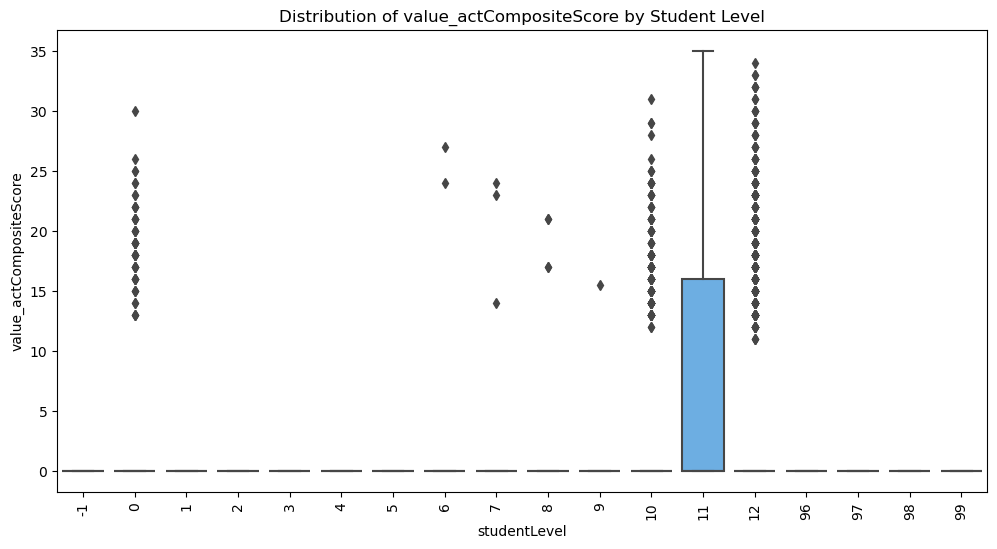

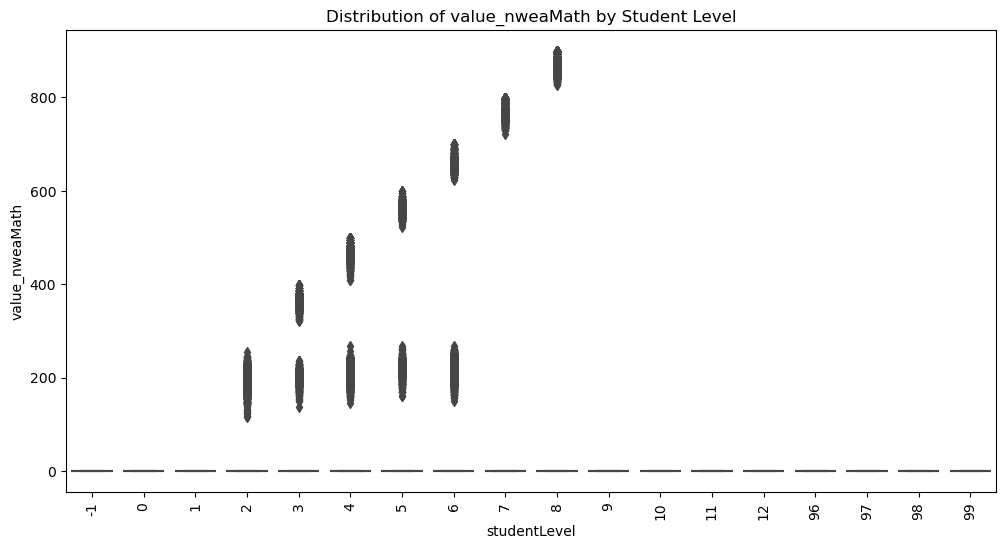

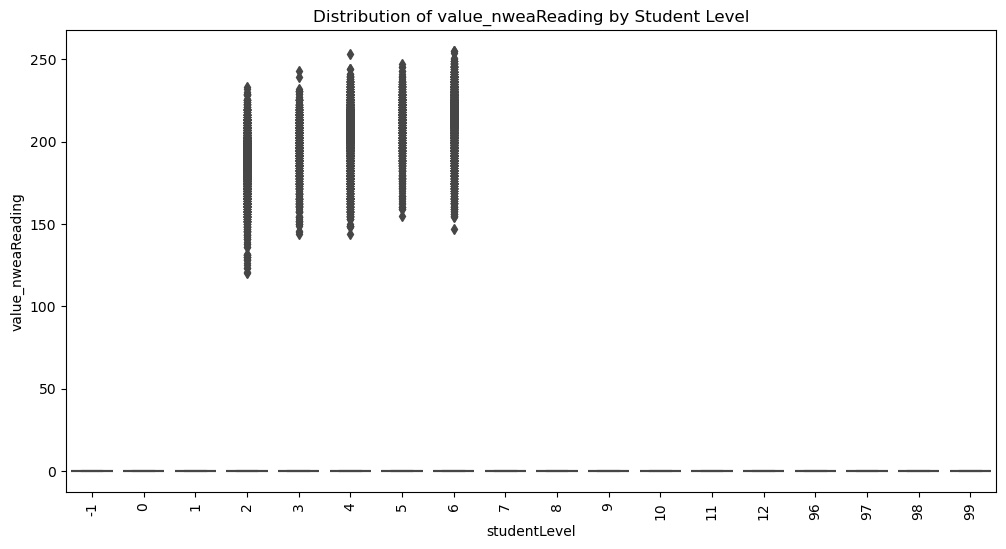

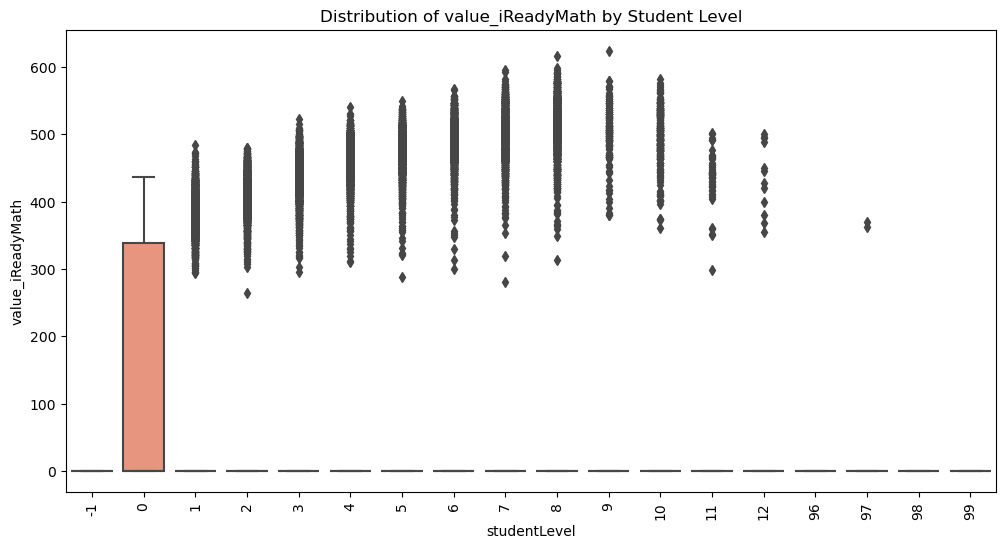

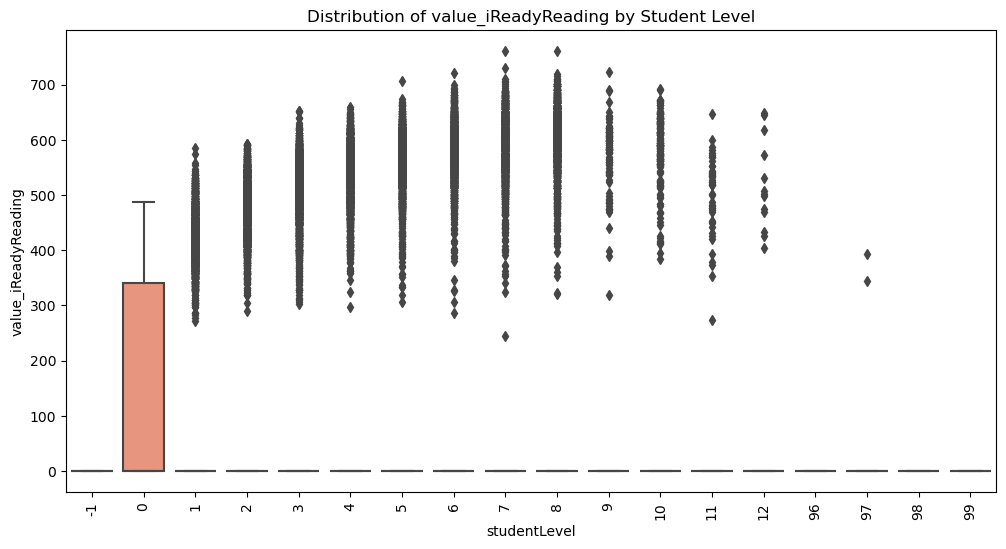

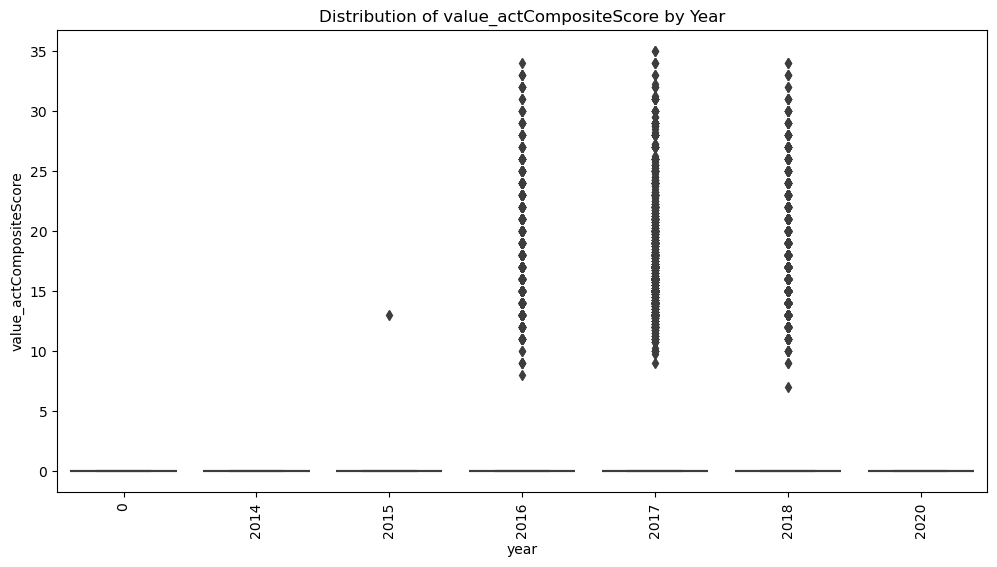

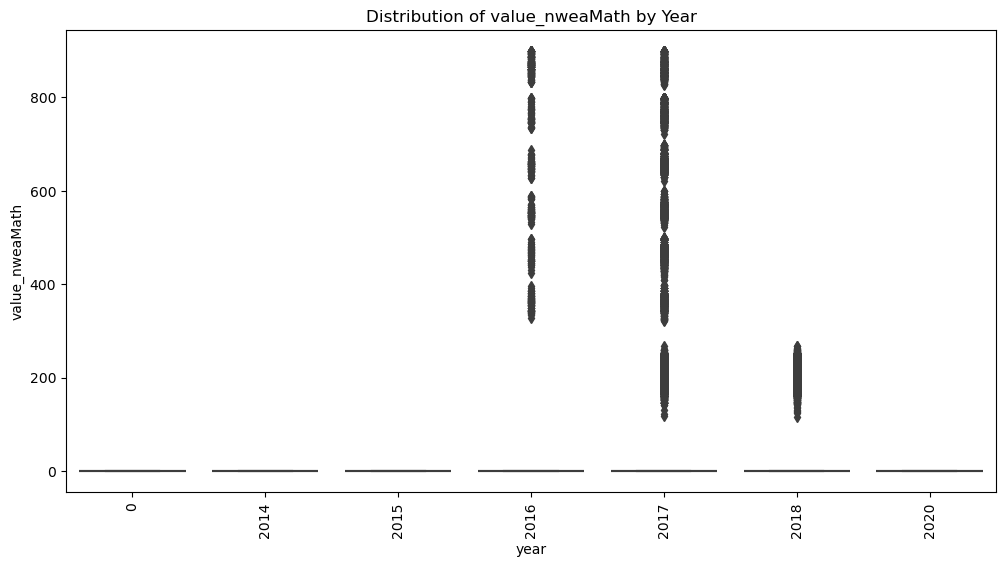

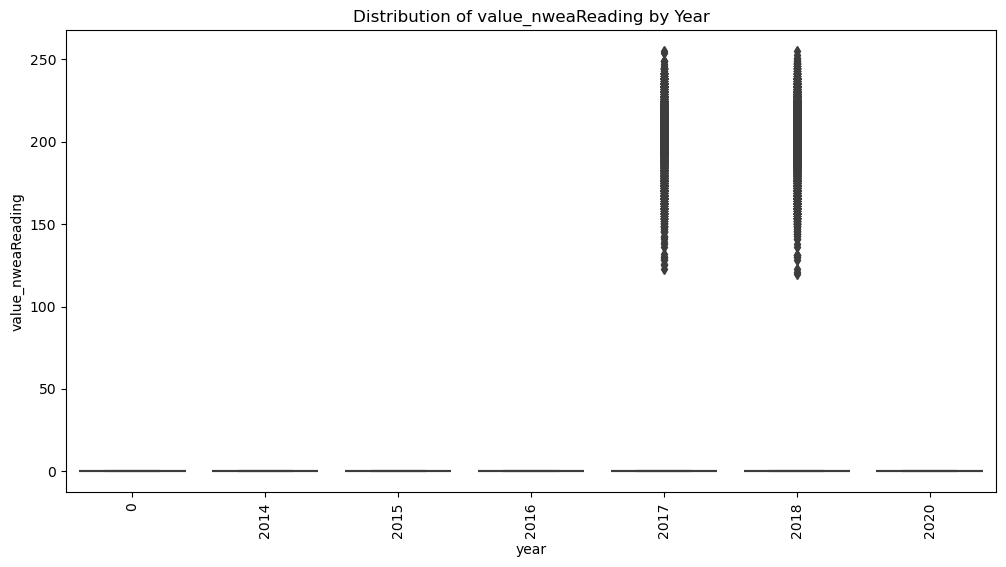

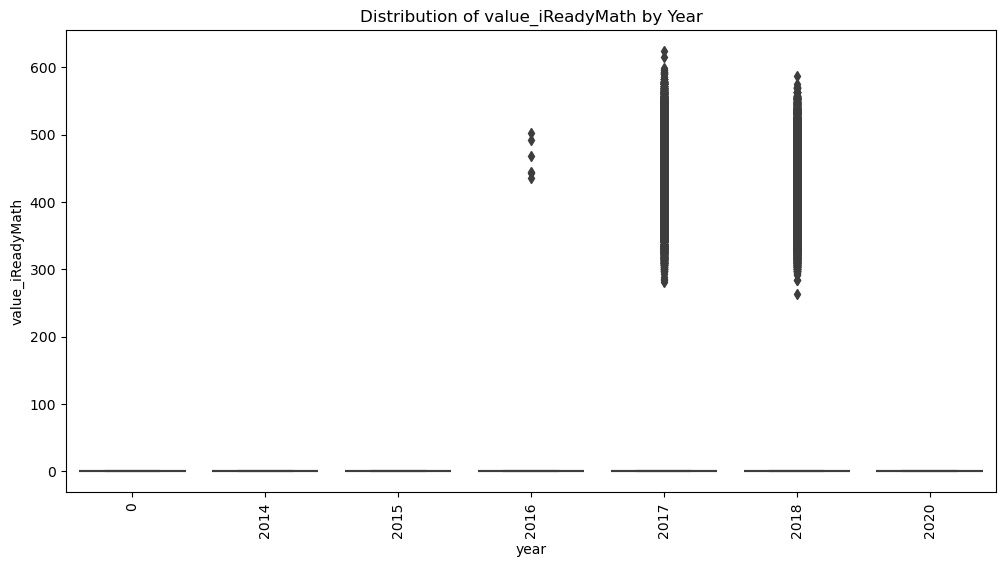

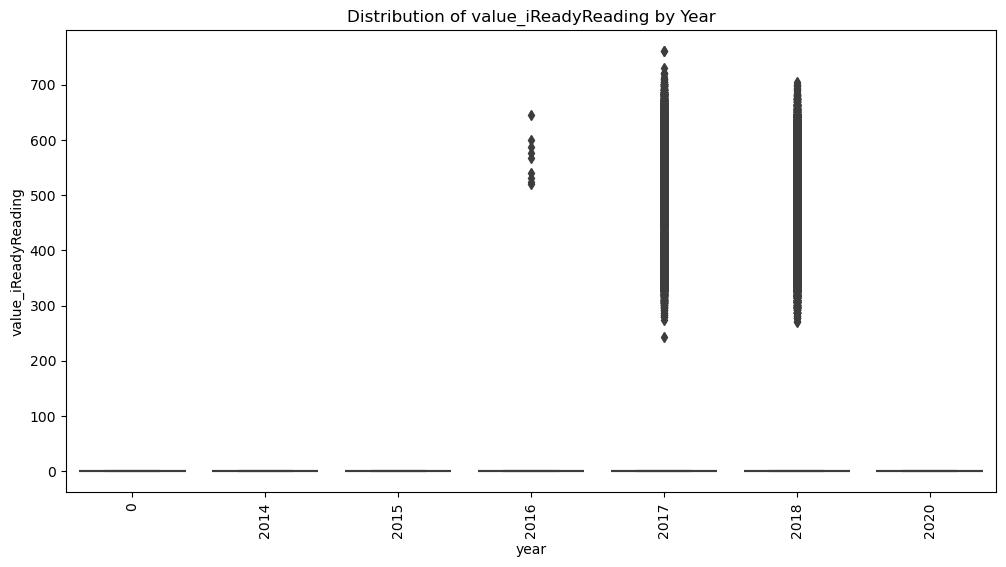

                  value_actCompositeScore                                   \
                                    count       mean       std   min   25%   
studentLevel year                                                            
-1           2016                     4.0   0.000000  0.000000   0.0   0.0   
 0           2016                   447.0   0.000000  0.000000   0.0   0.0   
             2017                  1520.0   0.651974  3.527462   0.0   0.0   
             2018                  3366.0   0.000000  0.000000   0.0   0.0   
 1           2016                   499.0   0.000000  0.000000   0.0   0.0   
             2017                  2850.0   0.000000  0.000000   0.0   0.0   
             2018                  4859.0   0.000000  0.000000   0.0   0.0   
 2           2016                   567.0   0.000000  0.000000   0.0   0.0   
             2017                  7360.0   0.000000  0.000000   0.0   0.0   
             2018                  9162.0   0.000000  0.000000  

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns


performance_metrics = [
    'value_actCompositeScore', 'value_nweaMath', 'value_nweaReading', 
    'value_iReadyMath', 'value_iReadyReading'
]

for metric in performance_metrics: # Boxplots for each performance metric by studentLevel
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=scores_df, x='studentLevel', y=metric)
    plt.title(f'Distribution of {metric} by Student Level')
    plt.xticks(rotation=90)
    plt.show()


for metric in performance_metrics: # Boxplots for each performance metric by year
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=scores_df, x='year', y=metric)
    plt.title(f'Distribution of {metric} by Year')
    plt.xticks(rotation=90)
    plt.show()

summary_stats = scores_df.groupby(['studentLevel', 'year'])[performance_metrics].describe()
print(summary_stats)


C:\Users\Muru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Muru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


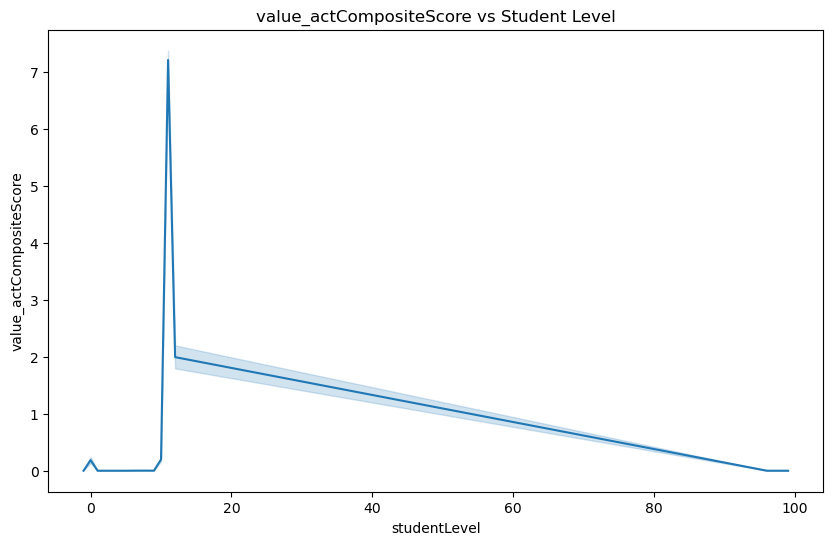

C:\Users\Muru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Muru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


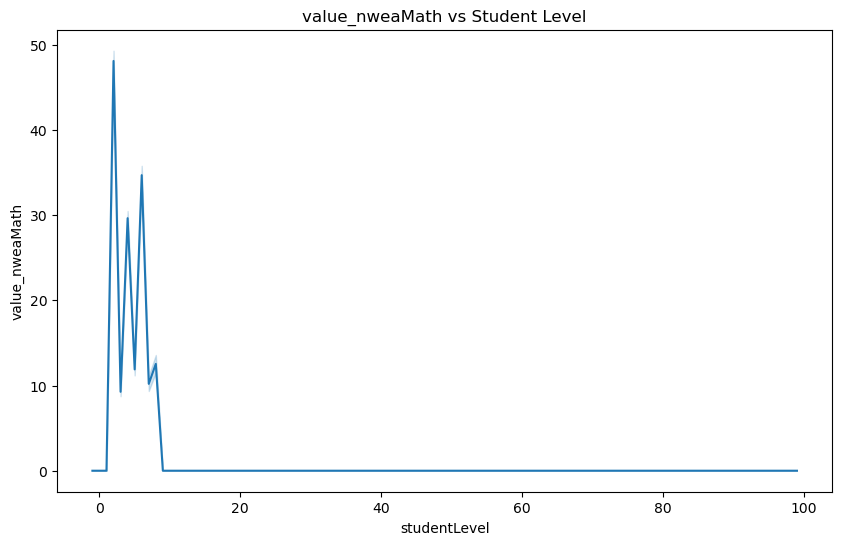

C:\Users\Muru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Muru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


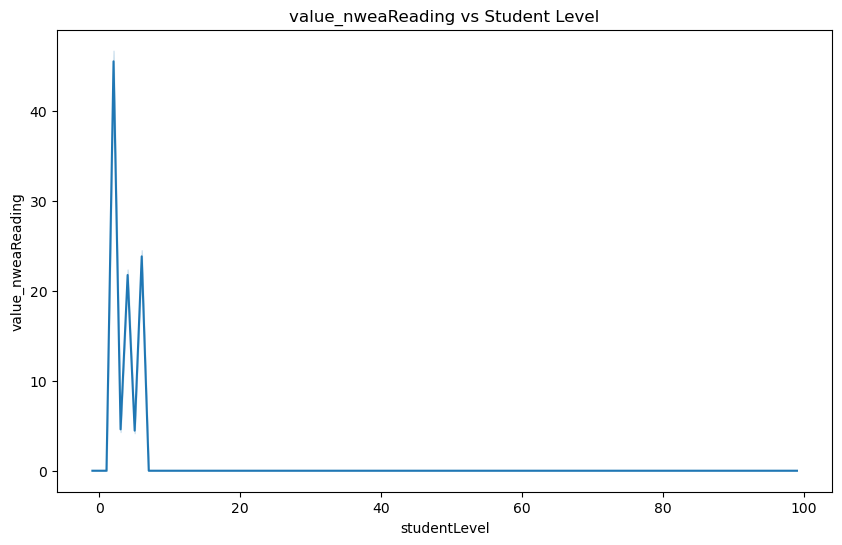

C:\Users\Muru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Muru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


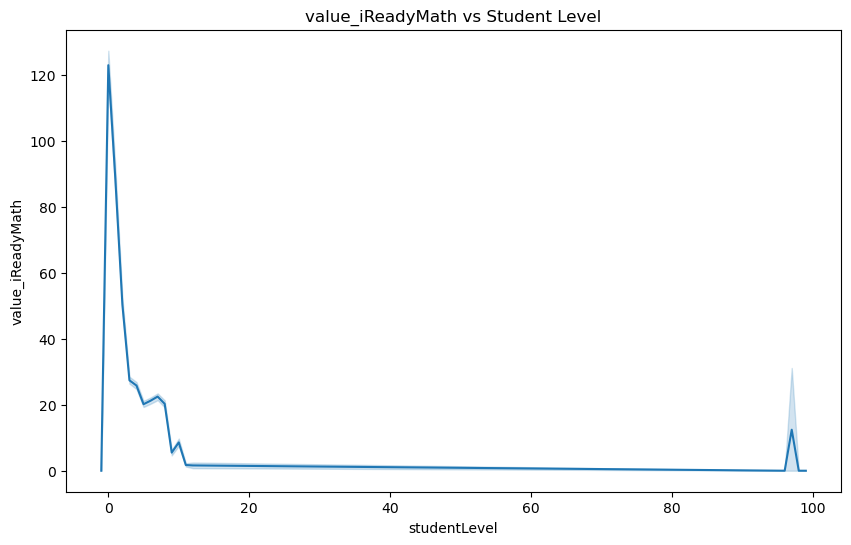

C:\Users\Muru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Muru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


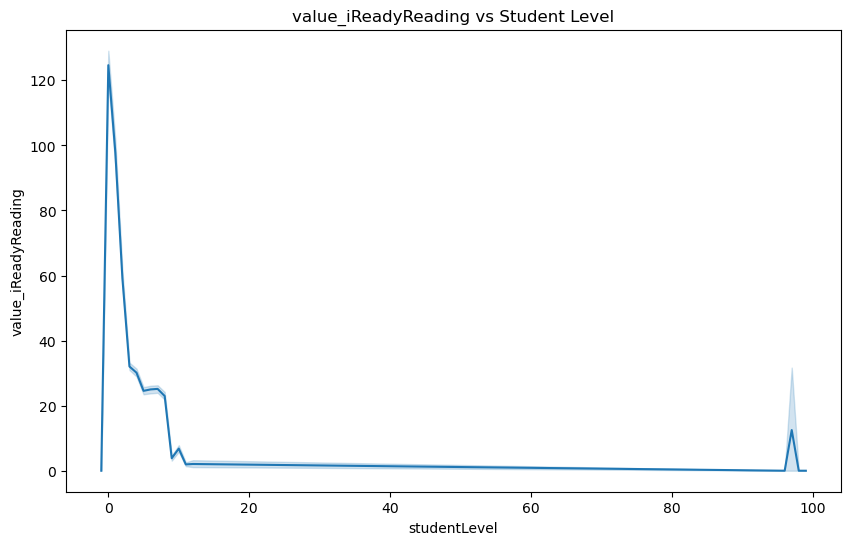

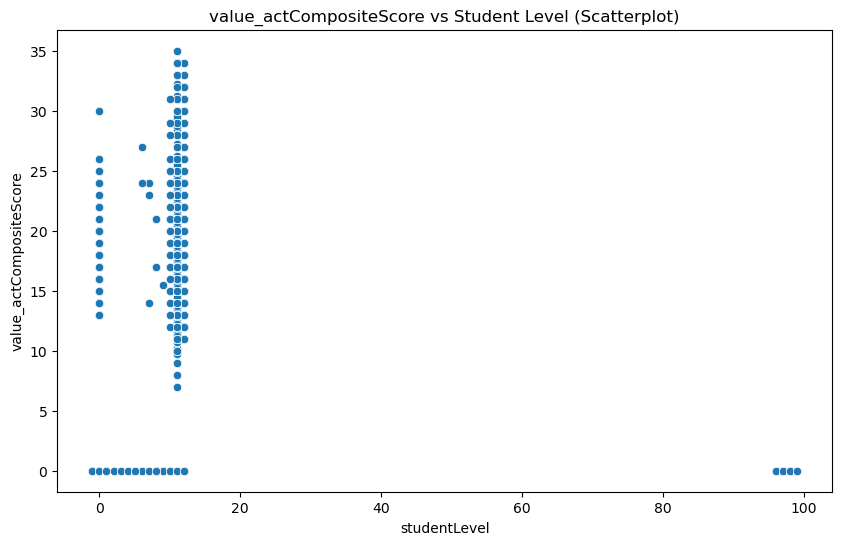

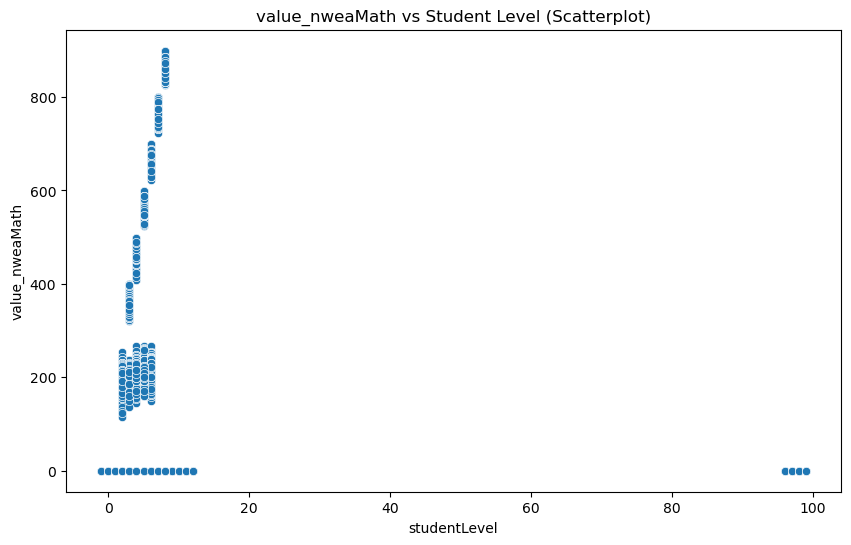

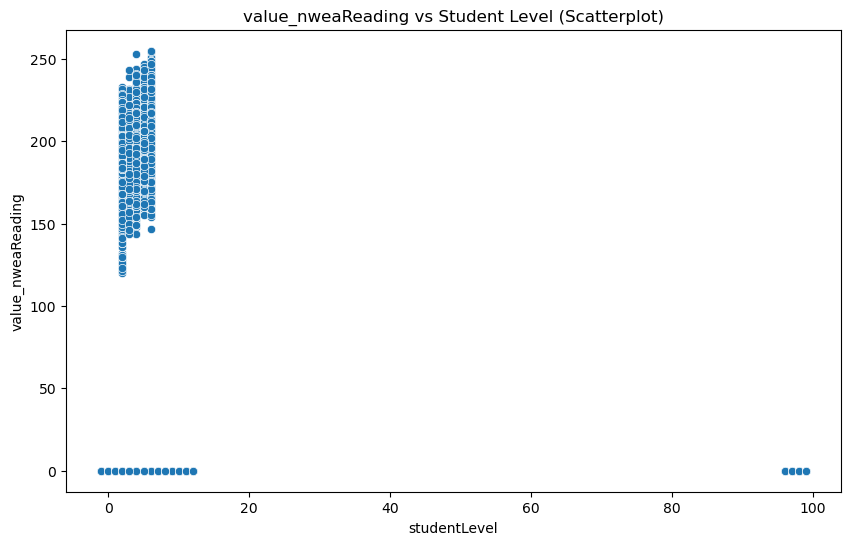

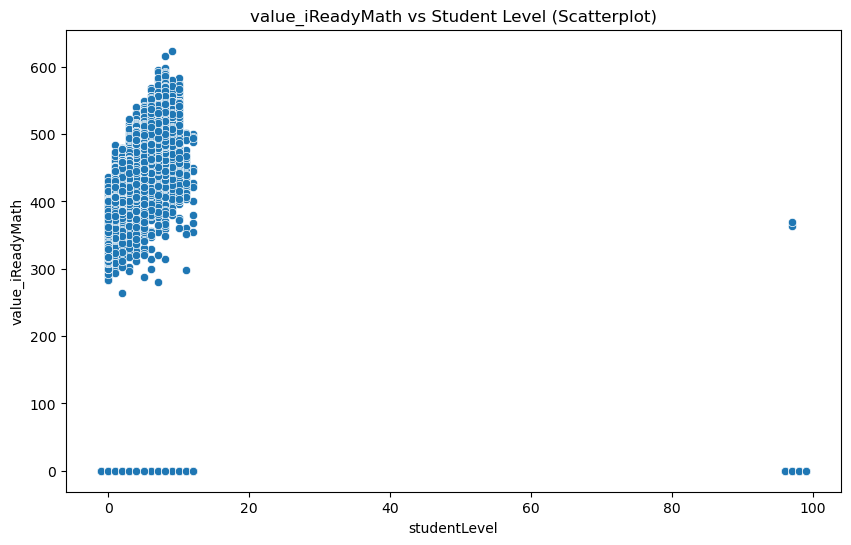

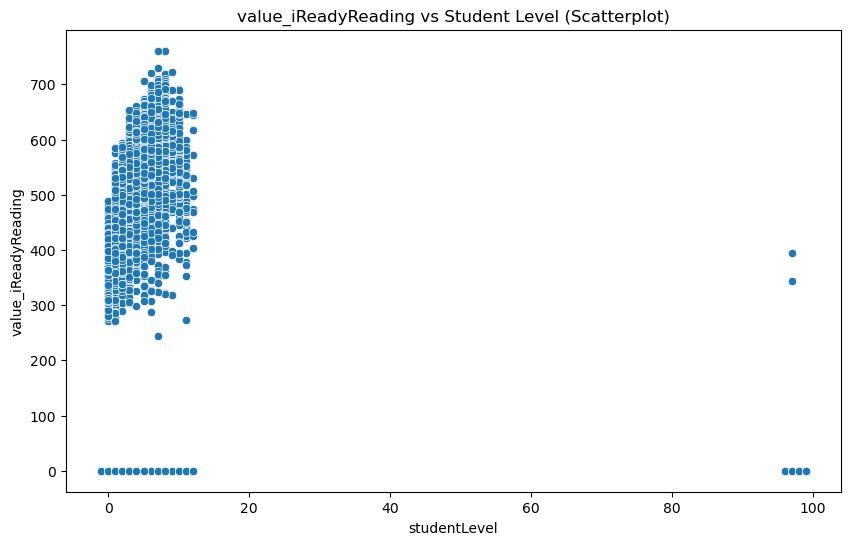

             value_actCompositeScore                                           \
                               count      mean       std  min  25%  50%   75%   
studentLevel                                                                    
-1                               4.0  0.000000  0.000000  0.0  0.0  0.0   0.0   
 0                            5333.0  0.185824  1.905634  0.0  0.0  0.0   0.0   
 1                            8208.0  0.000000  0.000000  0.0  0.0  0.0   0.0   
 2                           17089.0  0.000000  0.000000  0.0  0.0  0.0   0.0   
 3                           38960.0  0.000000  0.000000  0.0  0.0  0.0   0.0   
 4                           39257.0  0.000000  0.000000  0.0  0.0  0.0   0.0   
 5                           39053.0  0.000000  0.000000  0.0  0.0  0.0   0.0   
 6                           38309.0  0.001331  0.184565  0.0  0.0  0.0   0.0   
 7                           37406.0  0.001631  0.186491  0.0  0.0  0.0   0.0   
 8                          

In [64]:

for metric in performance_metrics: # Line plots to see trends across student_level for each performance metric
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=scores_df, x='studentLevel', y=metric)
    plt.title(f'{metric} vs Student Level')
    plt.show()

for metric in performance_metrics: # Scatter plot showing performance based on student level
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=scores_df, x='studentLevel', y=metric)
    plt.title(f'{metric} vs Student Level (Scatterplot)')
    plt.show()

# Summary statistics by student level
student_level_stats = scores_df.groupby('studentLevel')[performance_metrics].describe()
print(student_level_stats)


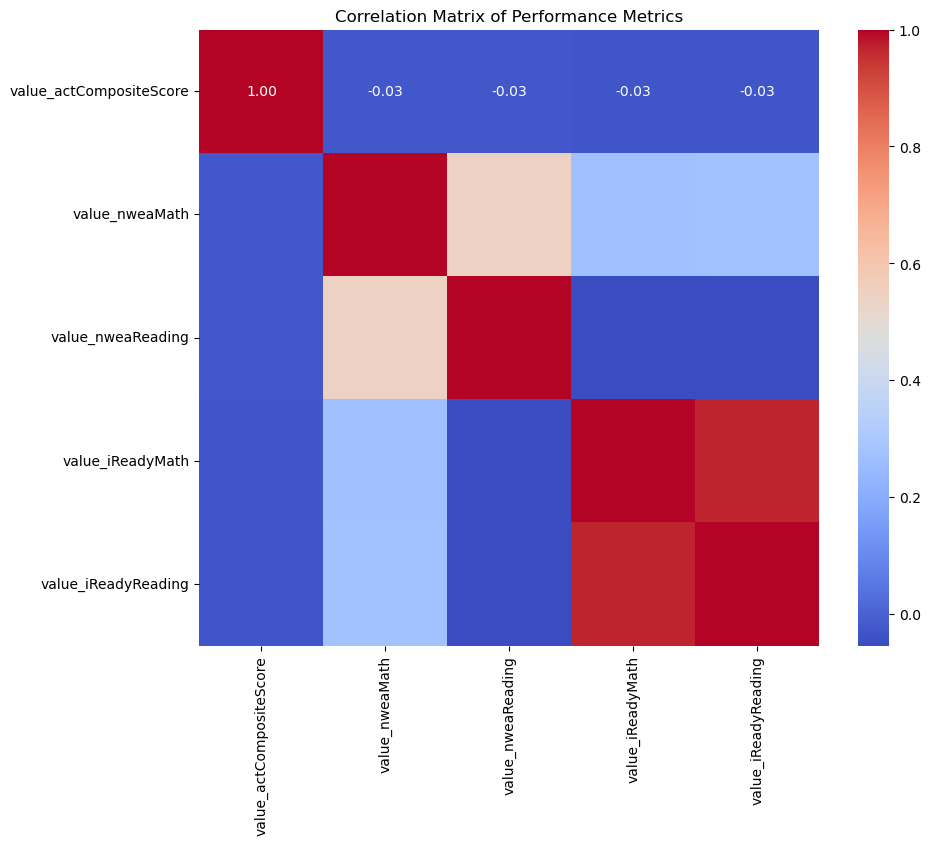

                                  value_actCompositeScore  value_nweaMath  \
studentId                                       -0.115741        0.162904   
measurementTypeId                                0.109112        0.068414   
subgroup_ell                                    -0.000473       -0.000765   
subgroup_bottom25                               -0.016300       -0.027587   
value_actMathScore                               0.981340       -0.027359   
value_actEnglishScore                            0.980398       -0.026561   
value_actReadingScore                            0.980918       -0.026720   
value_actScienceScore                            0.981843       -0.027078   
value_actCompositeScore                          1.000000       -0.027491   
value_nweaMath                                  -0.027491        1.000000   
value_nweaReading                               -0.028920        0.544939   
value_nweaEnglish                                     NaN             NaN   

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of performance metrics to analyze
performance_metrics = [
    'value_actCompositeScore', 'value_nweaMath', 'value_nweaReading', 
    'value_iReadyMath', 'value_iReadyReading'
]

# 1. Correlation Matrix for Performance Metrics
corr_matrix = scores_df[performance_metrics].corr()

# 2. Heatmap for Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Performance Metrics')
plt.show()

# 3. One-hot encode categorical variables that exist
categorical_columns = ['studentLevel', 'year', 'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender', 'subgroup_ethnicity']
scores_encoded = pd.get_dummies(scores_df, columns=categorical_columns)

# 4. Correlation with target performance metrics
correlations = scores_encoded.corr()[performance_metrics]
print(correlations)


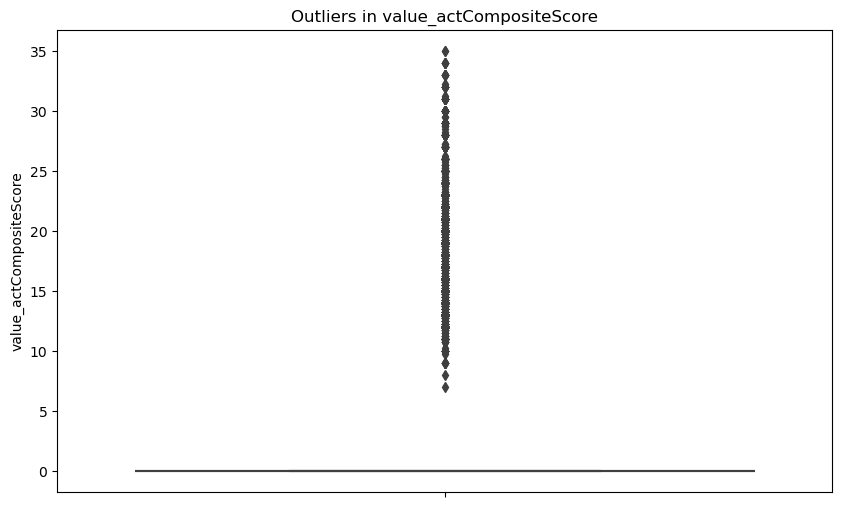

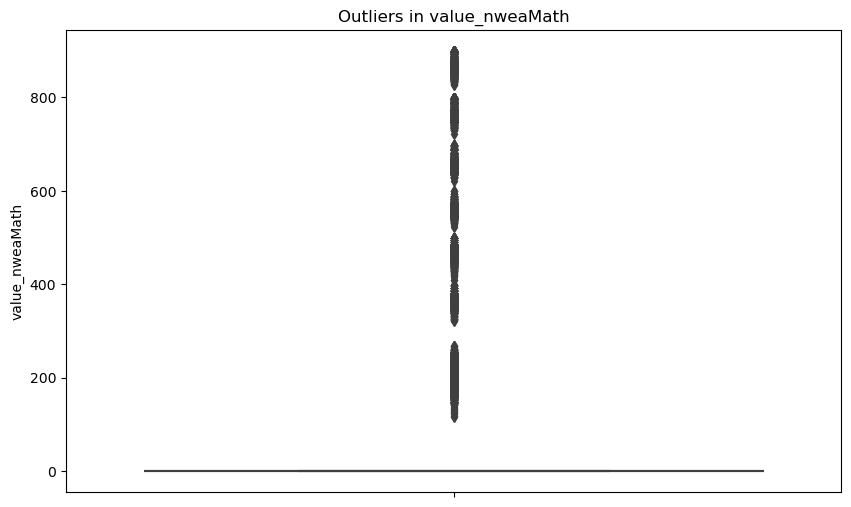

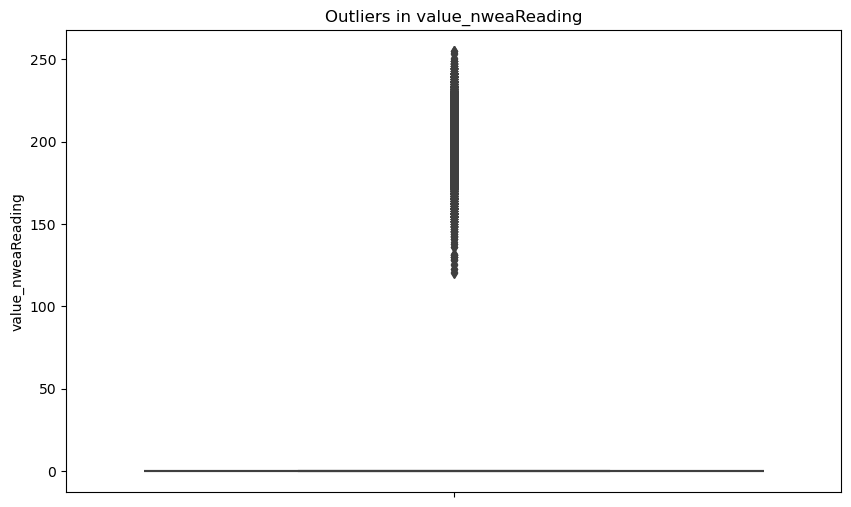

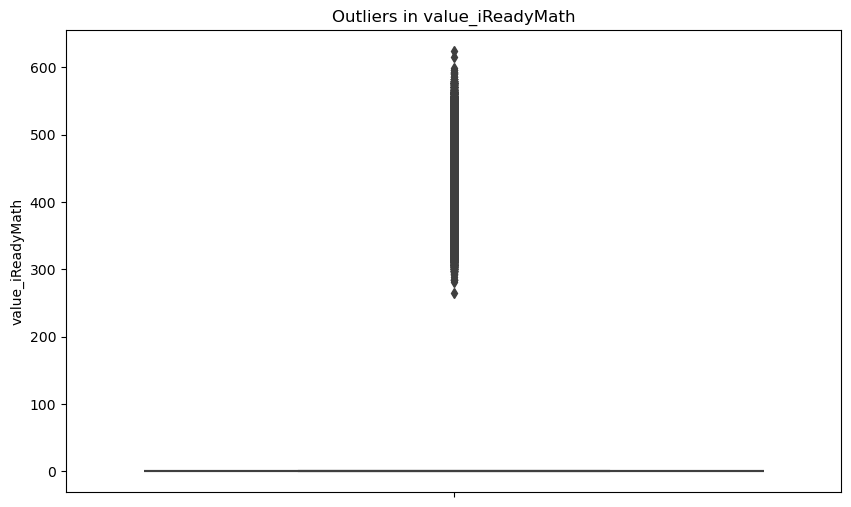

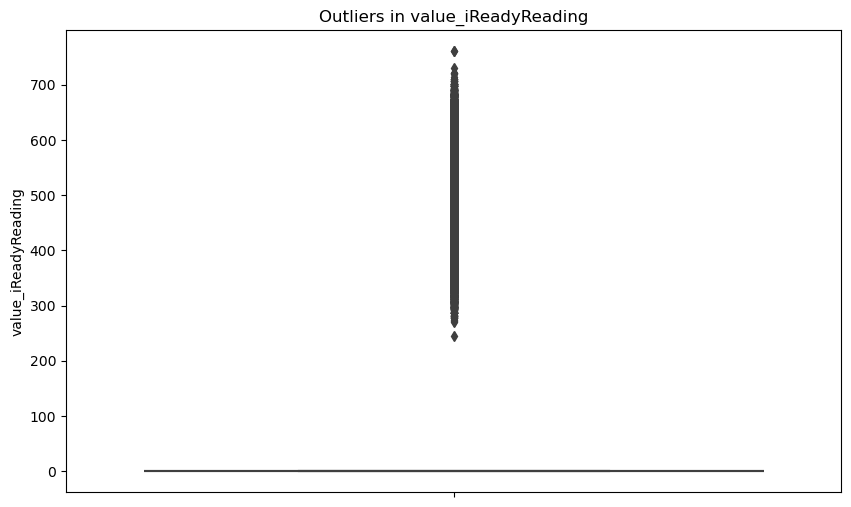

In [72]:
# Remove zero-only columns from the analysis
zero_only_columns = ['value_nweaEnglish', 'value_mapEnglish', 'value_scantronAlgebra', 
                     'value_eocMath', 'value_scantronGeometry', 'value_LEAPScience', 
                     'value_gcaInfo', 'value_gcaNar', 'value_gcaOpin', 'value_aimsWebMath', 
                     'value_aimsWebReading']


filtered_scores_df = scores_df.drop(columns=zero_only_columns) # Filter out columns with min/max of 0 (ranges)


for metric in performance_metrics: #check for outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=filtered_scores_df, y=metric)
    plt.title(f'Outliers in {metric}')
    plt.show()


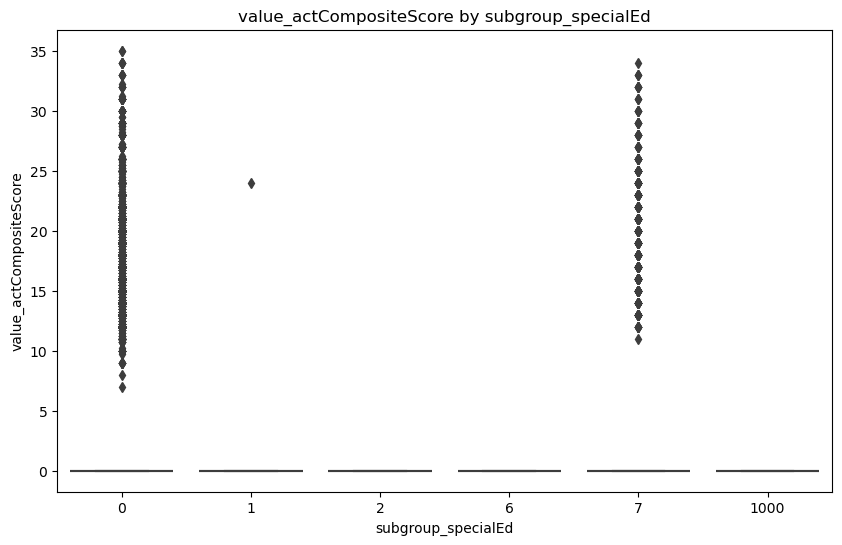

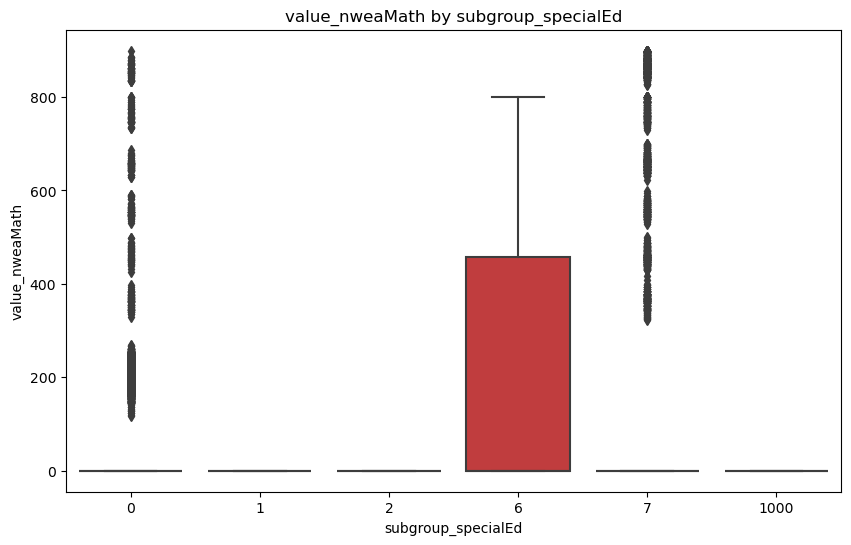

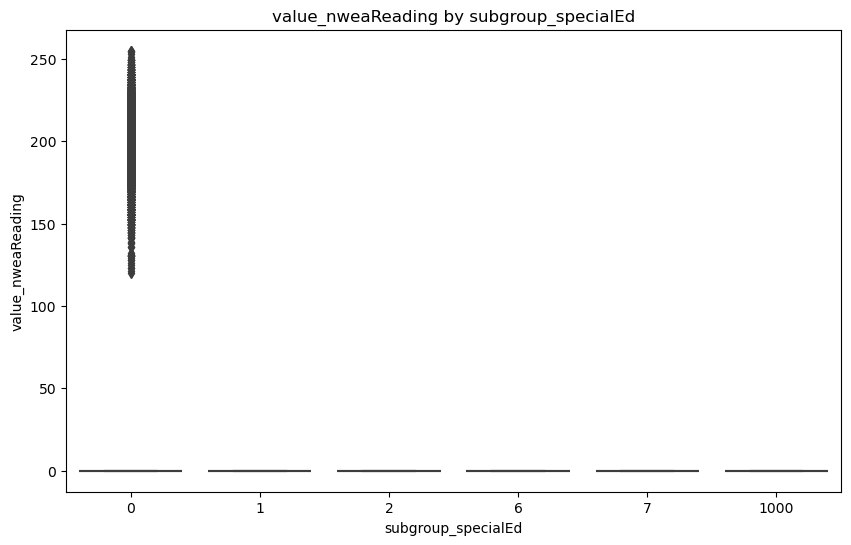

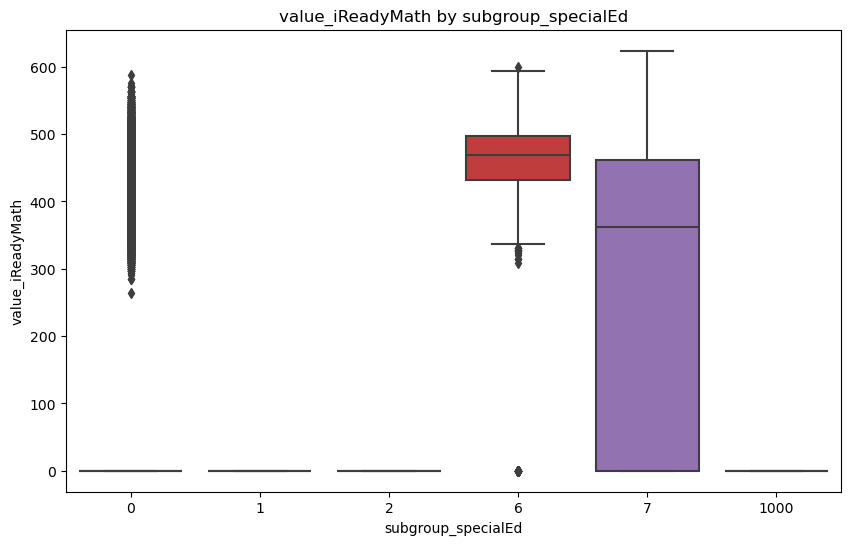

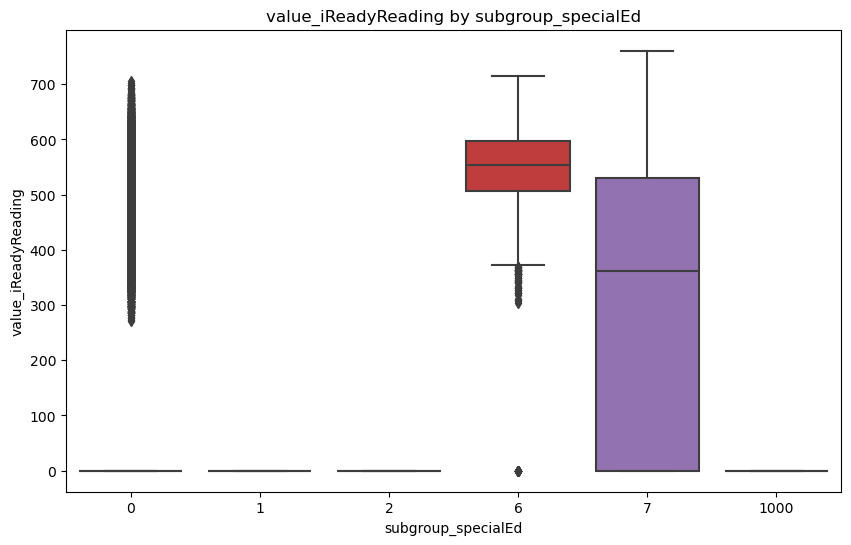

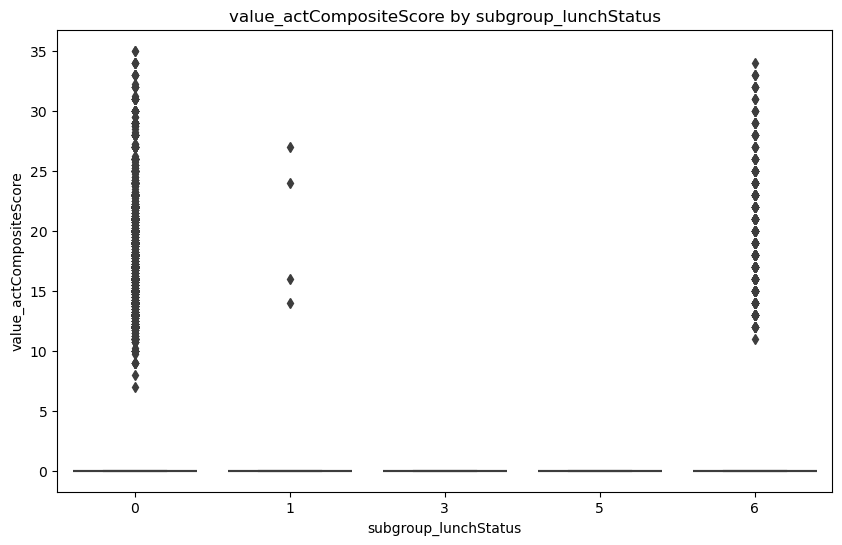

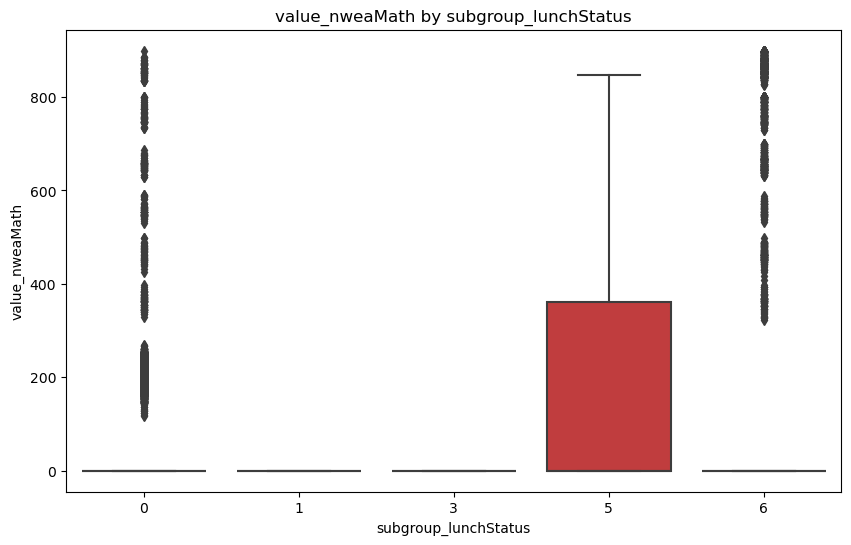

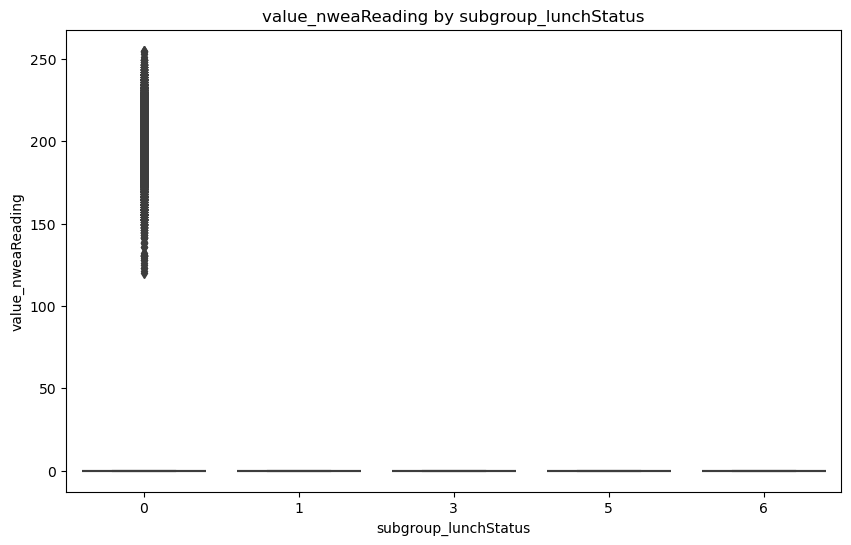

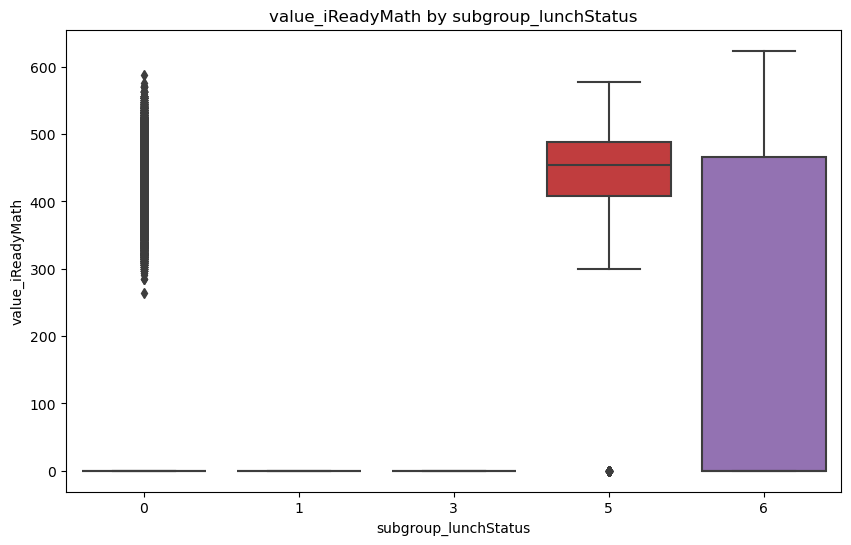

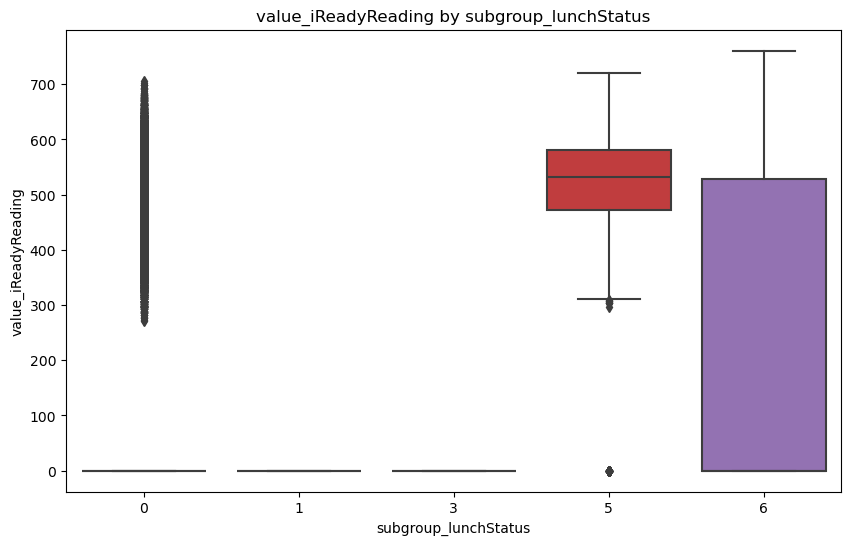

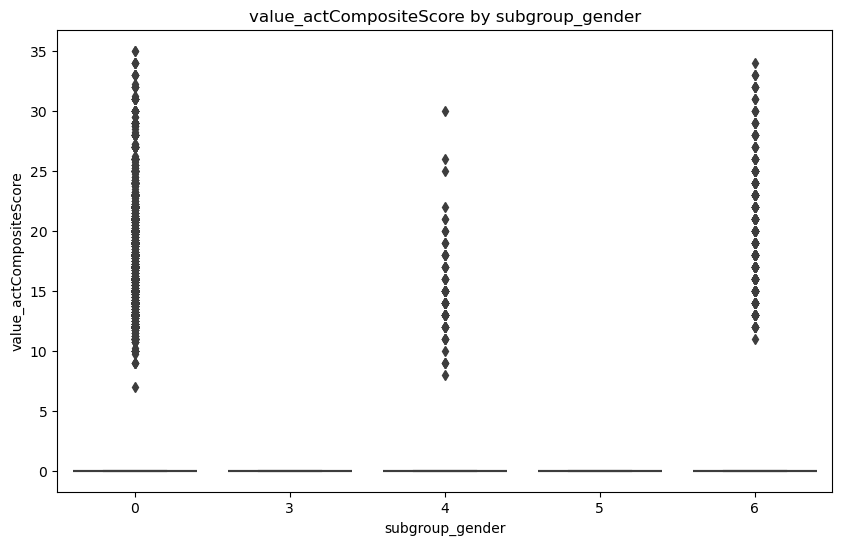

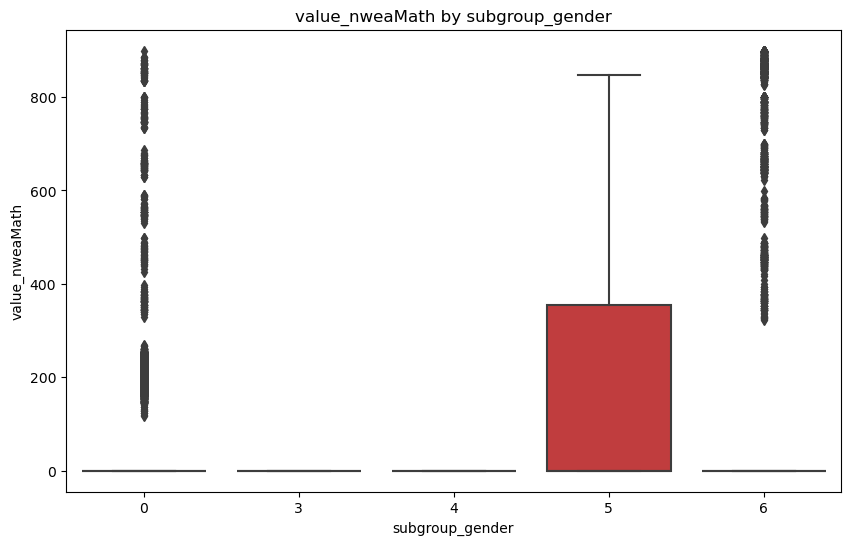

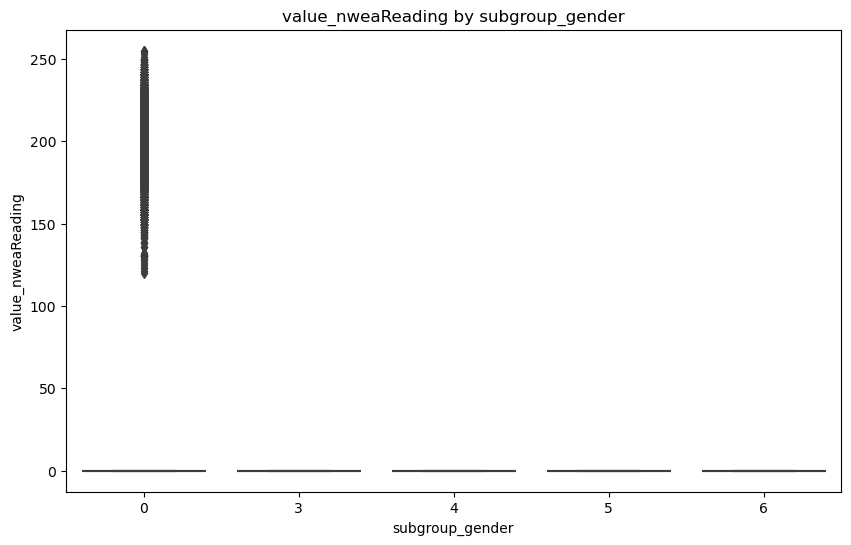

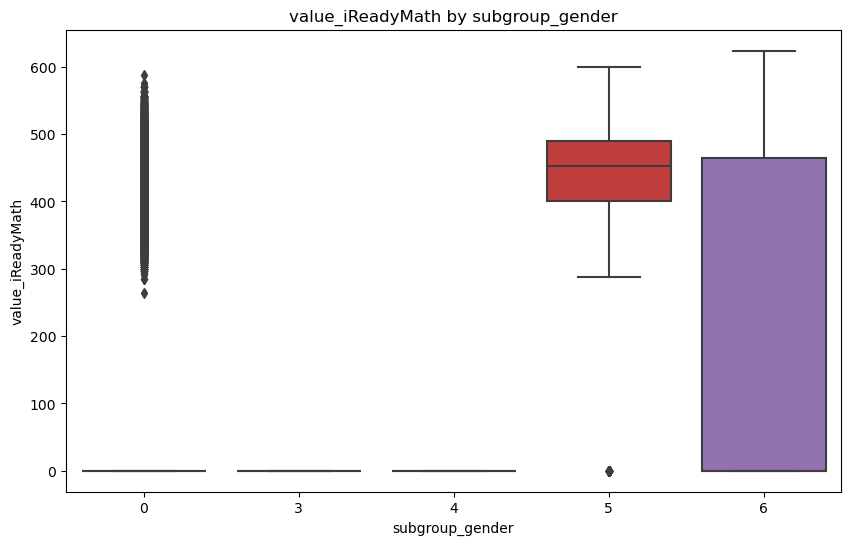

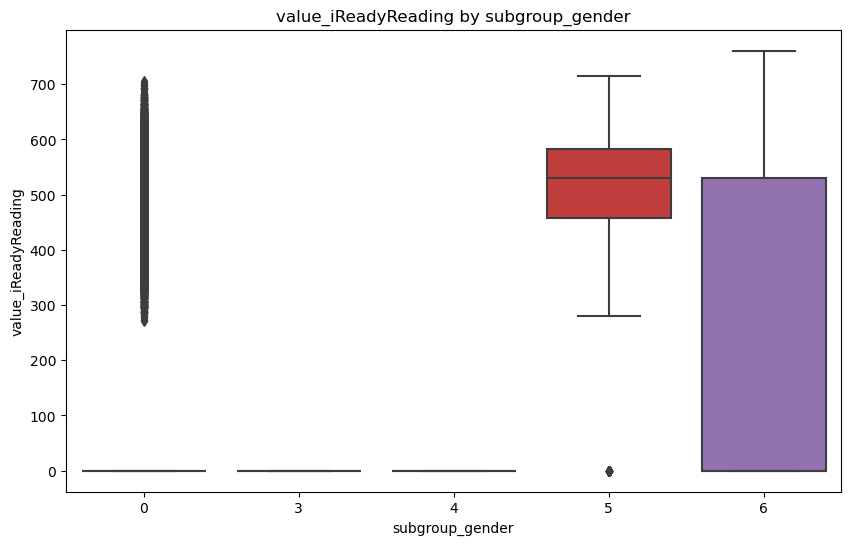

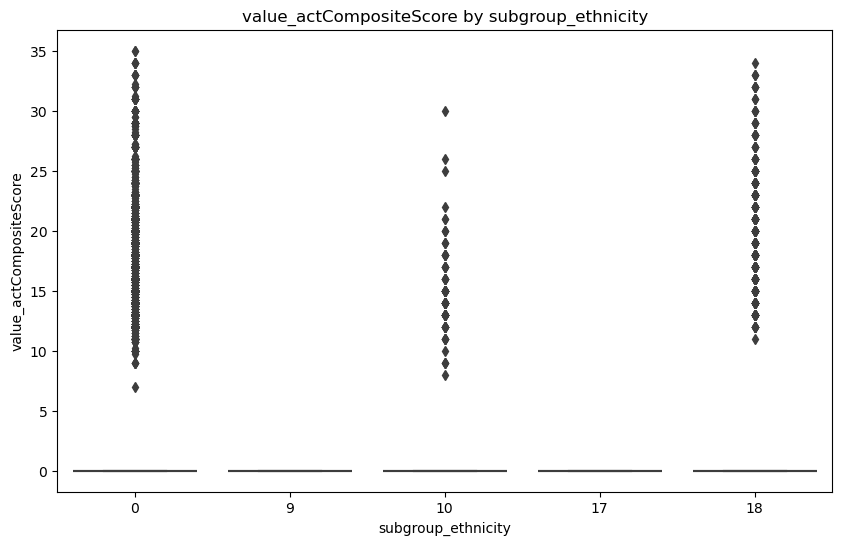

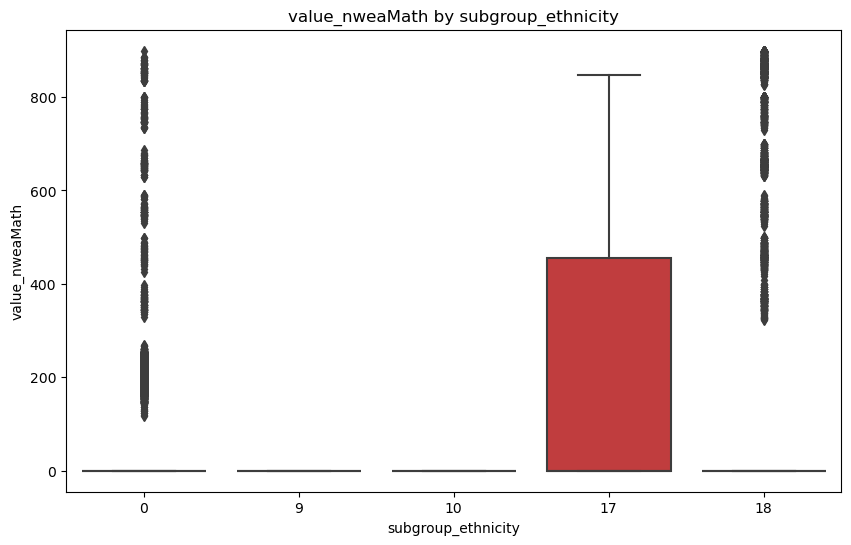

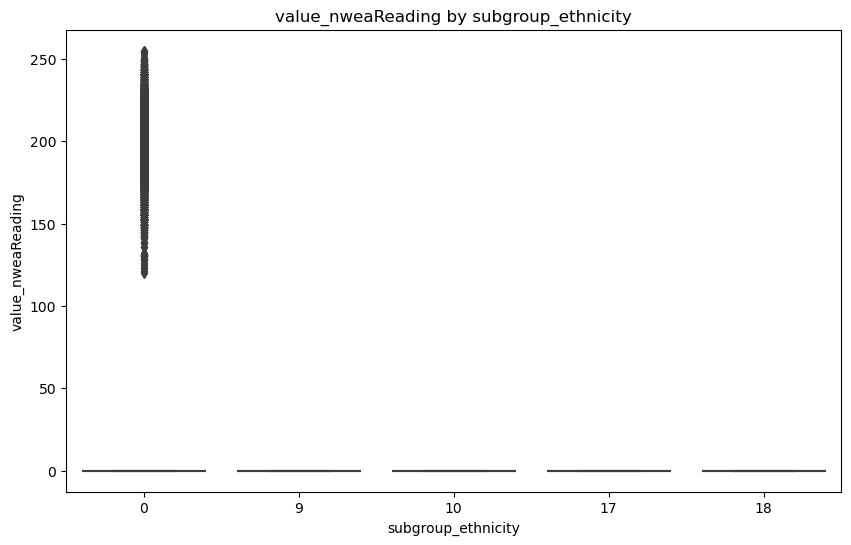

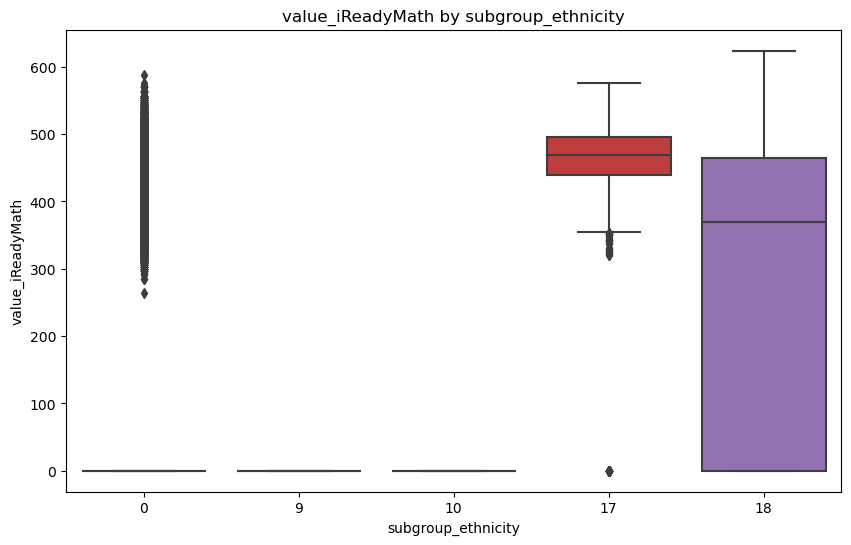

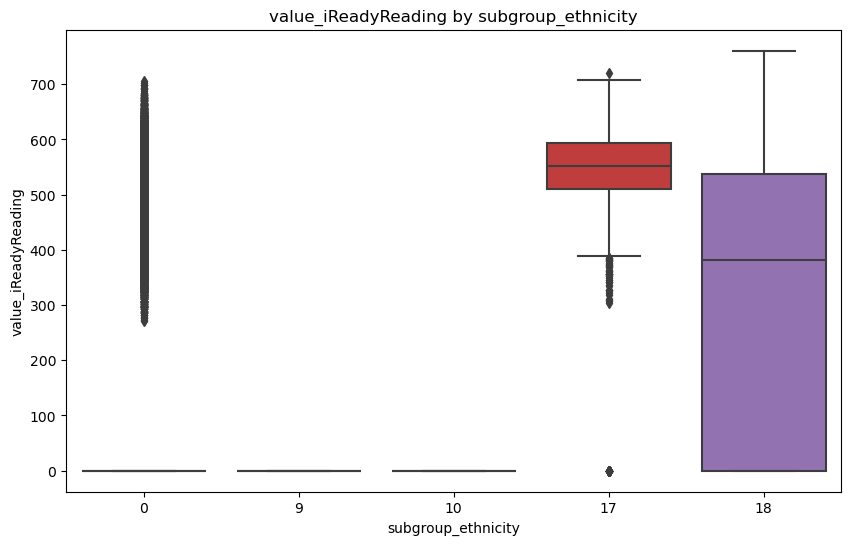

In [92]:
# Box plots for different subgroups
subgroup_columns = ['subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender', 'subgroup_ethnicity']

for subgroup in subgroup_columns:
    for metric in performance_metrics:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=scores_df, x=subgroup, y=metric)
        plt.title(f'{metric} by {subgroup}')
        plt.show()


